<img src="Figurer/NTNU_logo_vertical.svg" align="left" width="30%">
<br clear="all" />
<br><br>



# Fikspunktiterasjon og while-løkker


* Emne INGA1002 - Programmering, numerikk og sikkerhet
* Avsluttende tema i Programmering
* Underviser: Kai Erik Hoff


<br/><br/>

# Tema

* Intro til fikspunktiterasjon 

* Intro til while-løkker

* Bruk av while-løkker i fikspunktiterasjon


* Svakheter med fikspunktiterasjon

$$\Huge{ x = \cos(x) }$$

# Hvordan ville du gått frem for å løse ligningen?

<br>

$$\Huge{ x = \cos(x) }$$

## Grafisk løsning 

* Vi vet at $x \in \left( 0, \frac{\pi}{2} \right) $

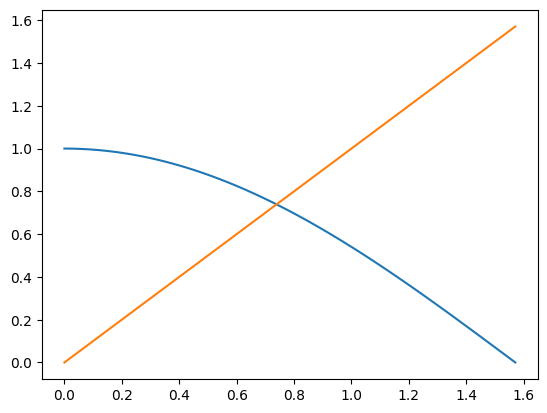

In [8]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, np.pi/2, 101)
plt.plot(x, np.cos(x))
plt.plot(x, x)

# Tilnærmet løsning med python




* En foreslått løsning bør ha minst mulig differanse mellom $x$ og $\cos(x)$

* Vi finner minimum i uttrykket $|x - \cos(x)|$

In [18]:
x_verdier = np.arange(0, np.pi/2, 0.01)
differanse = float("inf") # Starter med et VELDIG stort tall
x_losning = 0

for x in x_verdier:
    if np.abs(x - np.cos(x)) < differanse:
        differanse = np.abs(x - np.cos(x))
        x_losning = x

print(f"cos({x_losning}) ≈ {np.cos(x_losning)})")
print(f"Differanse |x - cos(x)| = {differanse}")

cos(0.74) ≈ 0.7384685587295879)
Differanse |x - cos(x)| = 0.0015314412704120484


# Ulemper med metoden

* nøyaktighet bestemt av antall datapunkt i `x`

* unødvendig mange kalkulasjoner

* Vi må finne en framgangsmåte som tar store skritt i starten, og mindre skritt etter hvert som vi nærmer oss den eksakte løsningen

<br>
<br>
$$\Huge{x_{n+1}} = \cos\left(x_n\right)$$

* Hva betyr dette?

* Vi trenger å starte med et initial-estimat for $x$, deretter kan vi repetere utregningen gjentatte ganger

# Fikspunktiterasjon

Output()

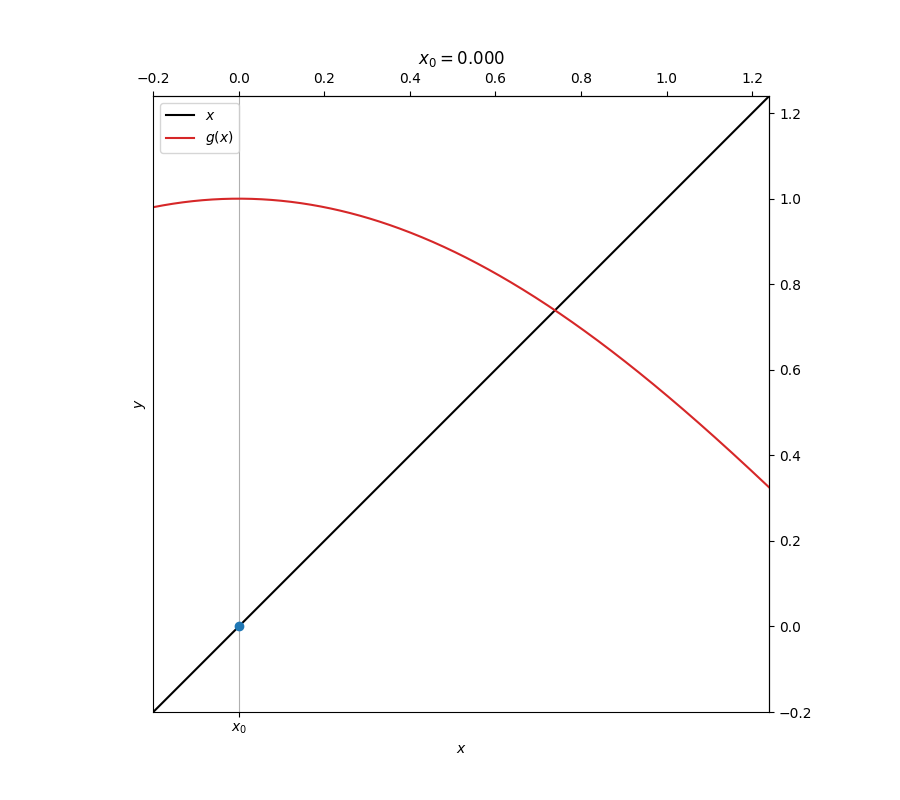

In [14]:
from numerikk_demoer import FixedPointDemo
from numpy import cos
%matplotlib widget

FixedPointDemo(cos, x0=0.0, N=20);

# Formell definisjon

* Hva er et fikspunkt?
    * En funksjon $g(x)$ har et "fikspunkt" dersom det finnes et punkt $x=r$ slik at $g(r) = r$

* Gitt en ligning på følgende form...
$$\Large x = g(x)$$

* Bestem en initialverdi for metoden, altså en verdi vi *tror* bør være noenlunde i nærheten av løsningen.
    * Eksempel:
$$\large x_0 = 0.0$$

* Fra $n=0$, utfør gjentatte beregninger av "oppdateringsfunksjonen " 
$$\large x_{n+1} = g(x_n)$$
    * dvs:
\begin{align*}
x_1 &= g(x_0) \\
x_2 &= g(x_1) \\
x_3 &= g(x_2) \\
x_4 &= g(x_3) \\
x_5 &= g(x_4) \\
& \vdots
\end{align*}

# Fikspunktiterasjon med python

In [21]:
x_n = 0.0 # Initialverdi

In [68]:
# Kjør denne cellen mange ganger!
x_n = np.cos(x_n)
print(f"cos({x_n}) ≈ {np.cos(x_n)})")
print(f"Differanse |x - cos(x)| = {np.abs(x_n - np.cos(x_n))}")

cos(0.7390851366465718) ≈ 0.7390851309037207)
Differanse |x - cos(x)| = 5.742851083567757e-09


* Med løkke:

In [19]:
x_n = 0.0 # Initialverdi
for i in range(20):
    x_n = np.cos(x_n)
print(f"cos({x_n}) ≈ {np.cos(x_n)})")
print(f"Differanse |x - cos(x)| = {np.abs(x_n - np.cos(x_n))}")

cos(0.7389377567153446) ≈ 0.7391843997714936)
Differanse |x - cos(x)| = 0.0002466430561490762


#### Refleksjoner: 
* Kuttet ned 314 løkke-repetisjoner til 20
* Mye bedre nøyaktighet

# Hva hvis ligningen ikke er på formen $x = g(x)$?

* Skriv om ligningen!

#### Eksempel:

\begin{align*}
2\cdot x^2 - 5 \cdot x + 2 &= 0 \\
x &= \frac{2 \cdot x^2 + 2}{5} \\ 
&\Downarrow \\
x_{n+1} &= \frac{2 \cdot x_n^2 + 2}{5}
\end{align*}

# Hvor mange iterasjoner er nok?


* Avhenger av ligningen

* Eksempel på ligning: $x = \frac{\pi}{2} - \cos(x)$

Output()

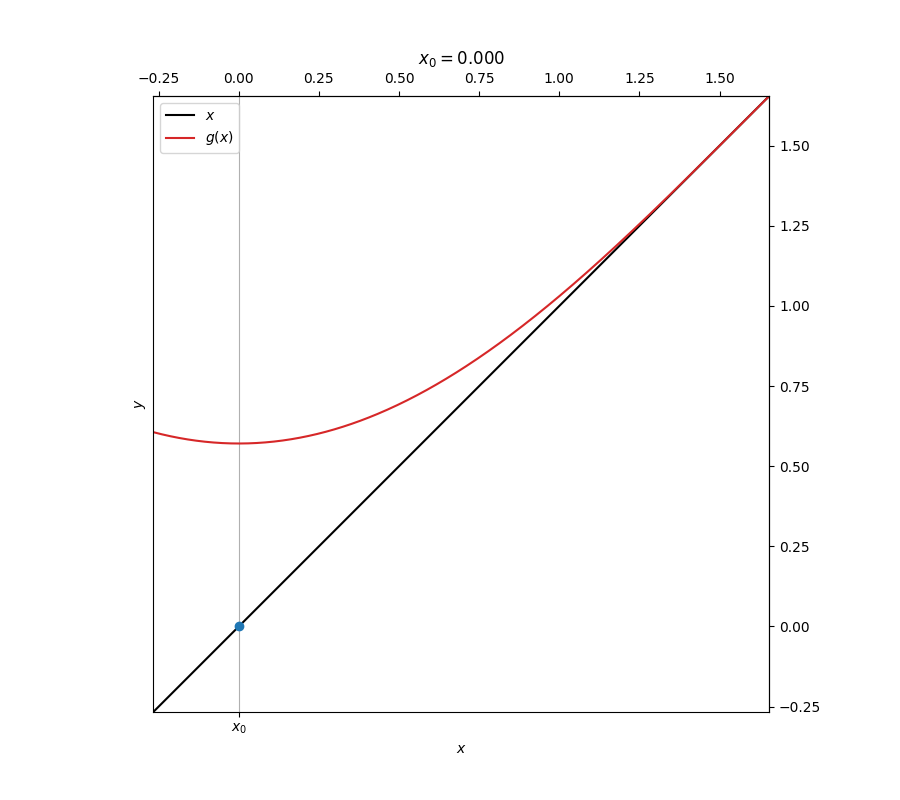

In [70]:
from numerikk_demoer import FixedPointDemo
from numpy import cos, pi
%matplotlib widget

FixedPointDemo(lambda x: pi/2-cos(x), x0=0.0, N=50);

# Hvordan håndterer vi ulike ligninger i et python-program?


1. Definer et tydelig kriterium for hva som regnes som en "god nok" løsning på ligningen



$$|x - g(x)| < \text{toleranse}$$

2. Sørg for at programmet utfører nok steg til at løsningen er "god nok"

<div style="margin-left:20px">
    <ul>
        <li>Vi trenger en <b>while</b>-løkke</li>
    </ul>
</div>

# While-løkker som konsept
<img src="Figurer/While_flowchart.png" width="70%" align="left">

# Å Skrive en while-løkke

* Generelt format fo en while-løkke i python
```python
while betingelse: # hvis True så...
    kodelinje1 # Én linje som kjøres i løkken
    kodelinje2 # Enda en linje som kjøres i løkken
kodelinje3 # Utføres etter at løkken er avsluttet
```

* Hvis betingelsen er `True` vil kodelinje 1 og 2 bli uført om og om igjen helt til betingelsen blir `False`
    * Kun kode med innrykk hører til while-løkka (altså ikke kodelinje 3)
    * Kodelinje 3 og videre kjøres etter at betingelsen er satt til false.

## While og For
* Hvordan de ulike løkkene teller opp til 5:

In [73]:
%%html
<iframe width="1200" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=%23%20While-l%C3%B8kke%20teller%20opp%20til%205%0Ax%20%3D%200%0Awhile%20x%20%3C%205%3A%0A%20%20%20%20print%28x%29%0A%20%20%20%20x%20%2B%3D%201%0A%20%20%20%20%0A%23%20For-l%C3%B8kke%20teller%20opp%20til%205%0Afor%20x%20in%20range%285%29%3A%0A%20%20%20%20print%28x%29&codeDivHeight=400&codeDivWidth=700&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=311&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

## Eksempel:
Vi har variablen $x=1$. Den skal ganges med to om og om igjen, helt til den er større enn $100$. Vi vil finne antallet ganginger vi trenger for å få dette til. Bruk en while-løkke til å gjøre dette.

In [74]:
%%html
<iframe width="1200" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=x%20%3D%201%0Ateller%20%3D%200%0A%0Awhile%20x%20%3C%3D%20100%3A%0A%20%20%20%20x%20*%3D%202%0A%20%20%20%20teller%20%2B%3D%201%0A%0Aprint%28f'Resulterende%20x%3A%20%7Bx%7D'%29%0Aprint%28f'Antall%20ganginger%3A%20%7Bteller%7D'%29&codeDivHeight=400&codeDivWidth=700&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

## Eksempel: søk i liste
Skriv en funksjon som søker gjennom en liste, og finner posisjonen til *den første* instansen av en tallverdi.

# While-løkke for fikspunktiterasjon

* Bruk en while-løkke til å finne en tilnærmet løsning for ligningen $x = \frac{\pi}{2} - \cos(x)$, der differansen mellom venstre og høyre side av likhetstegnet er mindre enn $10^{-4}$. Start med initialverdi $x_0 = 0$

# Kan fikspunktiterasjon løse "alle" ligninger?

* Kort svar: **nei!**
    * La oss illustrere poenget ved å se på en enkel ligning på formen $x = a \cdot x + b$

Output()

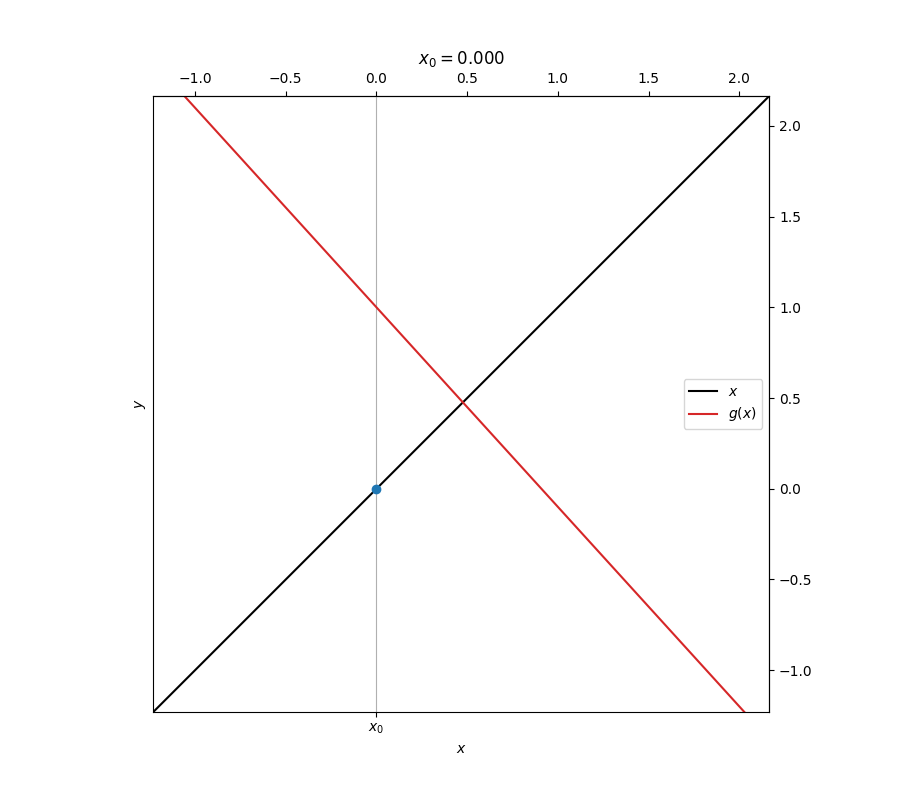

In [79]:
from numerikk_demoer import FixedPointDemo
from numpy import cos, pi
%matplotlib widget

a = -1.1
b = 1

FixedPointDemo(lambda x: a*x + b, x0=0.0, N=10);

# Fikspunktiterasjon og konvergens

* Fikspunktiterasjon vil konvergere mot fikspunktet $x=r$ *bare hvis* brattheten til funksjonen $g(x)$ i fikspunktet $x=r$ er mindre enn $1$. dvs:

$$ \Huge{\left| g'(r) \right|  < 1}$$

# Ligninger uten løsning

$$\Large x = \frac{2\cdot x^2 + 2}{3}$$

Output()

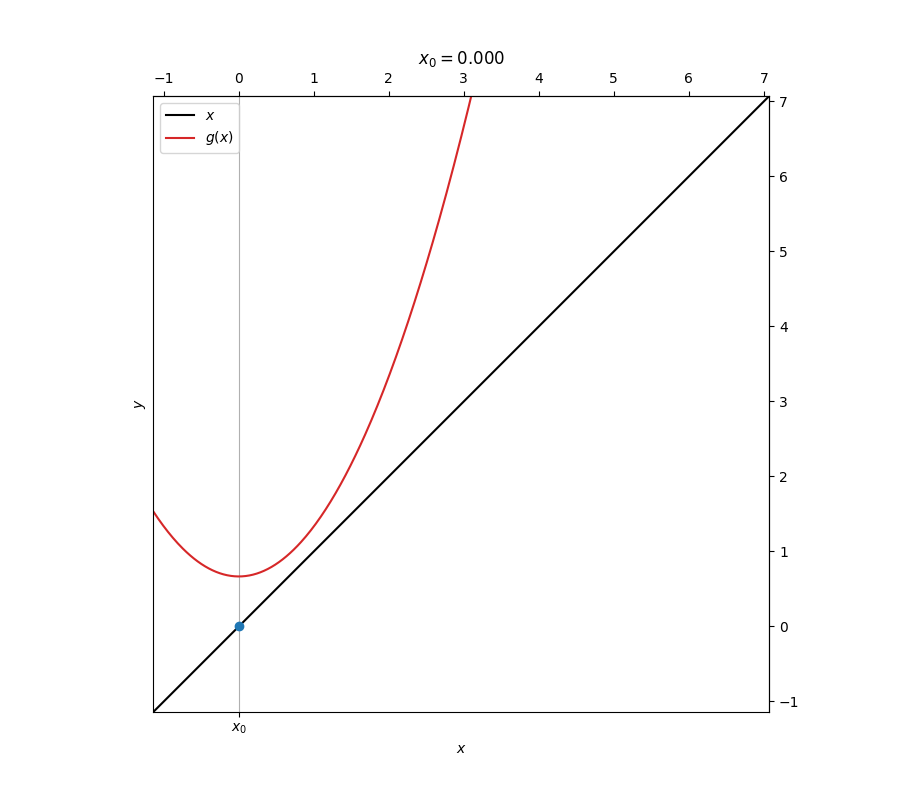

In [88]:
from numerikk_demoer import FixedPointDemo
from numpy import cos, pi
%matplotlib widget

FixedPointDemo(lambda x: (2*x**2 + 2)/3, x0=0.0, N=6);

# Unngå evige løkker!

* Løser du en ligning "i blinde", kan det godt hende ligningen ikke engang har en løsning
* Da vil løkken fortsette å repetere evig, og programmet "henger seg opp".
    * Alternativt vil programmet produsere en feilmelding når verdien av $x$ blir større enn Python klarer å håndtere
* Pass på at det _alltid_ finnes en realiserbar måte for programmet å komme seg ut av løkken.
    * For fikspunktiterasjon vil dette innebære at man f.eks. legger inn en maksgrense for antall iterasjoner

# Spørsmål?